# Import Libraries

In [6]:
# Lib & Dependencies
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

# Load data

In [7]:
train_datalink_X = 'https://tournament.datacrunch.com/data/X_train.csv'
train_datalink_y = 'https://tournament.datacrunch.com/data/y_train.csv'
hackathon_data_link = 'https://tournament.datacrunch.com/data/X_test.csv'

In [8]:
train_data = pd.read_csv(train_datalink_X)
test_data = pd.read_csv(hackathon_data_link)
train_targets = pd.read_csv(train_datalink_y)

In [9]:
train = train_data.merge(train_targets, left_index=True, right_index=True, how='inner')

In [10]:
train.head()

,Moons,id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,target_r,target_g,target_b
0,0,0x5c5369f3e1687b61,0.50,1.0,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.75,1.00,0.0
1,0,0x3874689d0b4888b8,0.50,1.0,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.75,0.50,0.0
2,0,0x8a3fda97cd9219c8,0.75,1.0,0.75,0.0,0.0,0.0,0.0,0.5,0.5,1.0,0.75,0.75,1.0,0.50,1.00,0.5
3,0,0x6be36f219426c022,0.50,1.0,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.50,0.75,0.5,0.25,0.00,0.0
4,0,0xd4584a6f7e1f2b6a,0.75,1.0,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.75,0.75,1.0


In [11]:
test_data.head()

,Moons,id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13
0,0,0x33aa5dd041631fa0,0.25,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,0,0xbd9da03cd0267e56,0.25,0.75,1.0,0.0,0.0,0.0,0.0,0.25,0.25,0.75,0.50,0.50,0.75
2,0,0xb95b58e7e25a02cf,0.00,0.25,0.0,0.0,0.0,0.0,0.0,0.75,0.75,0.75,1.00,0.50,0.75
3,0,0xad8af9c07a5770d3,0.25,0.75,1.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,0,0xcdc024f2efb69bc5,0.25,1.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.50,0.25,0.25,0.50


# Set features

In [12]:
# Feature columns
features = train.columns[train.columns.str.startswith('Feature')]
features

Index(['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5',
       'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10',
       'Feature_11', 'Feature_12', 'Feature_13'],
      dtype='object')

# Targets

In [13]:
# Targets columns
targets = train.columns[train.columns.str.startswith('target')]
targets

Index(['target_r', 'target_g', 'target_b'], dtype='object')

# Observations per Moon

,Observations
count,14.000000
mean,467.000000
std,9.607689
min,448.000000
25%,460.750000
50%,469.500000
75%,474.500000
max,478.000000


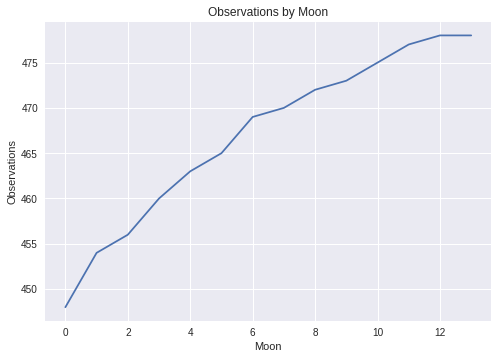

In [14]:
plt.style.use('seaborn')
moonCount = Counter()
for moon in train['Moons']:
    moonCount[moon] += 1
moonCount = pd.DataFrame.from_dict(moonCount, orient='index', columns=['Observations'])
moonCount.plot(legend=None)
plt.xlabel('Moon')
plt.ylabel('Observations')
plt.title('Observations by Moon')
moonCount.describe()

In [15]:
train.describe()

,Moons,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,target_r,target_g,target_b
count,6538.000000,6538.000000,6538.000000,6538.000000,6538.000000,6538.000000,6538.000000,6538.000000,6538.000000,6538.000000,6538.000000,6538.000000,6538.000000,6538.000000,6538.000000,6538.000000,6538.000000
mean,6.578006,0.493423,0.500000,0.490670,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.485852,0.486273,0.486273,0.486273,0.500000,0.500000,0.500000
std,4.023351,0.357847,0.353607,0.343442,0.353607,0.353607,0.353607,0.353607,0.353607,0.353607,0.367620,0.367623,0.367623,0.367623,0.353607,0.353607,0.353607
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,0.250000
50%,7.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,10.000000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000
max,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Targets distribution

In [16]:
# Target columns that are supposed to represent different time horizons
train[targets].describe()

,target_r,target_g,target_b
count,6538.000000,6538.000000,6538.000000
mean,0.500000,0.500000,0.500000
std,0.353607,0.353607,0.353607
min,0.000000,0.000000,0.000000
25%,0.250000,0.250000,0.250000
50%,0.500000,0.500000,0.500000
75%,0.750000,0.750000,0.750000
max,1.000000,1.000000,1.000000


In [17]:
# Number of observations per target value
train[targets].apply(lambda x: x.value_counts())

,target_r,target_g,target_b
0.00,1308,1308,1308
0.25,1307,1307,1307
0.50,1308,1308,1308
0.75,1307,1307,1307
1.00,1308,1308,1308


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

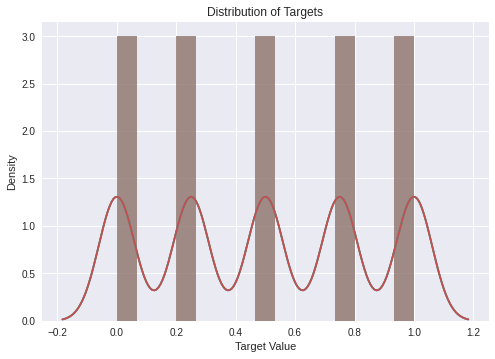

In [18]:
# Identical Distribution of target values
sns.distplot(train['target_r'], hist=True, kde=True, bins=15)
sns.distplot(train['target_g'], hist=True, kde=True, bins=15)
sns.distplot(train['target_b'], hist=True, kde=True, bins=15)
plt.xlabel('Target Value')
plt.ylabel('Density')
plt.title('Distribution of Targets')
plt.show()

# Train / Test objects info

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6538 entries, 0 to 6537
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Moons       6538 non-null   int64  
 1   id          6538 non-null   object 
 2   Feature_1   6538 non-null   float64
 3   Feature_2   6538 non-null   float64
 4   Feature_3   6538 non-null   float64
 5   Feature_4   6538 non-null   float64
 6   Feature_5   6538 non-null   float64
 7   Feature_6   6538 non-null   float64
 8   Feature_7   6538 non-null   float64
 9   Feature_8   6538 non-null   float64
 10  Feature_9   6538 non-null   float64
 11  Feature_10  6538 non-null   float64
 12  Feature_11  6538 non-null   float64
 13  Feature_12  6538 non-null   float64
 14  Feature_13  6538 non-null   float64
 15  target_r    6538 non-null   float64
 16  target_g    6538 non-null   float64
 17  target_b    6538 non-null   float64
dtypes: float64(16), int64(1), object(1)
memory usage: 919.5+ KB


In [20]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3436 entries, 0 to 3435
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Moons       3436 non-null   int64  
 1   id          3436 non-null   object 
 2   Feature_1   3436 non-null   float64
 3   Feature_2   3436 non-null   float64
 4   Feature_3   3436 non-null   float64
 5   Feature_4   3436 non-null   float64
 6   Feature_5   3436 non-null   float64
 7   Feature_6   3436 non-null   float64
 8   Feature_7   3436 non-null   float64
 9   Feature_8   3436 non-null   float64
 10  Feature_9   3436 non-null   float64
 11  Feature_10  3436 non-null   float64
 12  Feature_11  3436 non-null   float64
 13  Feature_12  3436 non-null   float64
 14  Feature_13  3436 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 402.8+ KB


# Spearman Correlation Matrix

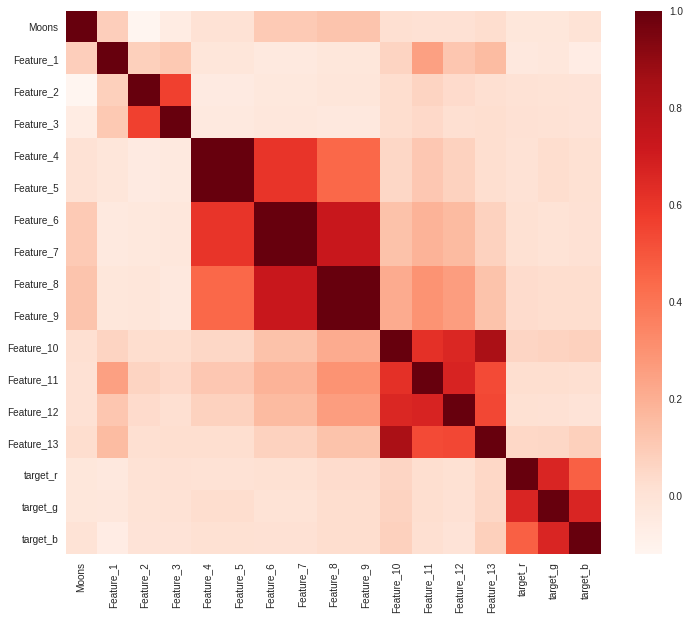

In [21]:
#Using Spearman Correlation
plt.figure(figsize=(12,10))
cor = train.corr(method = 'spearman')
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
plt.show()

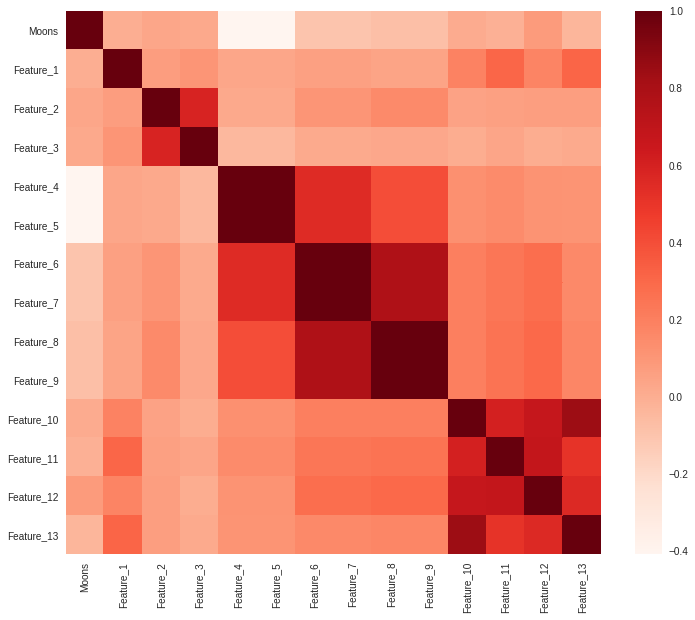

In [22]:
#Using Spearman Correlation
plt.figure(figsize=(12,10))
cor = test_data.corr(method = 'spearman')
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
plt.show()

# Feature Correlations

In [23]:
feature_corrs = train[features].corr()

In [24]:
feature_corrs.stack().head()

Feature_1  Feature_1    1.000000
           Feature_2    0.080772
           Feature_3    0.112692
           Feature_4   -0.018587
           Feature_5   -0.018587
dtype: float64

In [25]:
tdf = feature_corrs.stack()
tdf = tdf[tdf.index.get_level_values(0) < tdf.index.get_level_values(1)]
tdf.sort_values()

Feature_2   Feature_5    -0.048020
            Feature_4    -0.048020
Feature_1   Feature_6    -0.041255
            Feature_7    -0.041255
Feature_3   Feature_4    -0.040623
                            ...   
Feature_7   Feature_9     0.729622
Feature_10  Feature_13    0.835270
Feature_6   Feature_7     1.000000
Feature_4   Feature_5     1.000000
Feature_8   Feature_9     1.000000
Length: 78, dtype: float64

In [26]:
moons = train.Moons

In [27]:
df1 = train[moons<=moons.median()]
df2 = train[moons>moons.median()]

In [28]:
corr1 = df1[features].corr().unstack()
corr1 = corr1[corr1.index.get_level_values(0) < corr1.index.get_level_values(1)]

In [29]:
corr2 = df2[features].corr().unstack()
corr2 = corr2[corr2.index.get_level_values(0) < corr2.index.get_level_values(1)]

In [30]:
tdf = pd.DataFrame({
    "corr1": corr1,
    "corr2": corr2,
})
tdf["corr_diff"] = tdf.corr2 - tdf.corr1
tdf.sort_values(by="corr_diff")

corr1     corr2  corr_diff
Feature_2  Feature_3   0.604079  0.507988  -0.096091
Feature_10 Feature_11  0.663545  0.578261  -0.085284
Feature_2  Feature_8   0.018881 -0.060256  -0.079138
           Feature_9   0.018881 -0.060256  -0.079138
Feature_12 Feature_2   0.068771 -0.005034  -0.073805
...                         ...       ...        ...
           Feature_6   0.132315  0.196615   0.064300
Feature_10 Feature_6   0.104496  0.170975   0.066479
           Feature_7   0.104496  0.170975   0.066479
Feature_12 Feature_8   0.231826  0.300497   0.068672
           Feature_9   0.231826  0.300497   0.068672

[78 rows x 3 columns]

# Feature Correlation over time (Moons)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


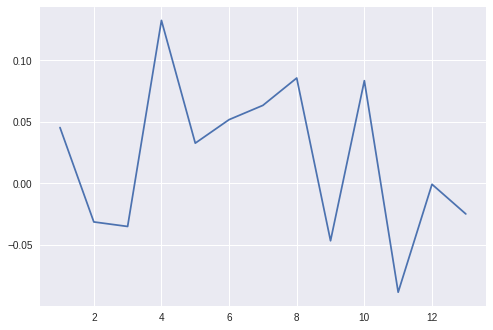

In [32]:
# Single features do not work consistently though
by_moon_correlation = pd.Series({
    moon: np.corrcoef(tdf['target_r'], tdf["Feature_2"])[0,1]
    for moon, tdf in train.groupby(moons)
})
by_moon_correlation.plot()

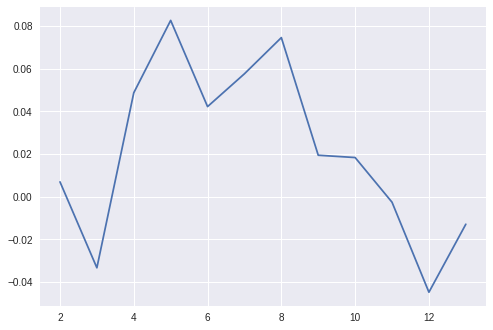

In [33]:
# With a rolling 2 moons average you can see some trends
by_moon_correlation.rolling(2).mean().plot()